INTRODUCTION TO DATA SCIENCE (LSTM MODEL TO PREDICT AVERAGE WEATHER OF ESKISEHIR TURKEY)









In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import data 
df = pd.read_csv('/content/sample_data/export (10).csv',index_col='date',parse_dates=True,usecols=['date','tavg'])
y = df['tavg'].fillna(method='ffill')
y = y.values.reshape(-1, 1)

In [ ]:
#pip install statsmodels
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test for stationarity
#The p-value(0.09) is obtained is greater than significance level of 0.05, hence our data is no-stationary.  but the advantage of the model we are using 
# is not affected by stationarity
adfuller(df)

(-2.607746052569356,
 0.09140686095612549,
 5,
 673,
 {'1%': -3.4401039634870623,
  '5%': -2.8658441302164346,
  '10%': -2.569062085956077},
 2768.7452503591467)

In [ ]:
#lets know the number of rows and colums of data (average temperature)
df.values.shape

(679, 1)

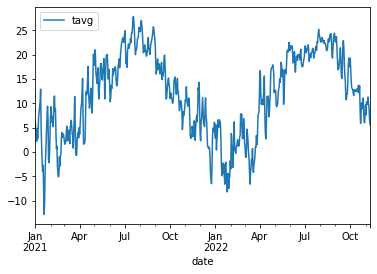

In [ ]:
# line plot of average temperature for two years 
df.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]
# [[[2], [3], [4], [5], [6]
# [[[3], [4], [5], [6], [7]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

  

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(df['tavg'], WINDOW_SIZE)
X1.shape, y1.shape

((674, 5, 1), (674,))

In [ ]:
# dividing our data into training and testing
X_train1, y_train1 = X1[:360], y1[:360]
X_val1, y_val1 = X1[360:670], y1[360:670]
X_test1, y_test1 = X1[670:], y1[670:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((360, 5, 1), (360,), (310, 5, 1), (310,), (4, 5, 1), (4,))

In [ ]:
# defining the model to be used
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(100))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 8)                 808       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 41,617
Trainable params: 41,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
#traing our model
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=200, callbacks=[cp1])

Epoch 1/200
11/12 [==========================>...] - ETA: 0s - loss: 216.1123 - root_mean_squared_error: 14.7008 

12/12 [==============================] - 7s 478ms/step - loss: 215.7580 - root_mean_squared_error: 14.6887 - val_loss: 239.8152 - val_root_mean_squared_error: 15.4860
Epoch 2/200
11/12 [==========================>...] - ETA: 0s - loss: 209.4892 - root_mean_squared_error: 14.4737

12/12 [==============================] - 4s 407ms/step - loss: 209.1754 - root_mean_squared_error: 14.4629 - val_loss: 233.0091 - val_root_mean_squared_error: 15.2646
Epoch 3/200
12/12 [==============================] - ETA: 0s - loss: 203.9398 - root_mean_squared_error: 14.2808

12/12 [==============================] - 5s 424ms/step - loss: 203.9398 - root_mean_squared_error: 14.2808 - val_loss: 227.8263 - val_root_mean_squared_error: 15.0939
Epoch 4/200
 9/12 [=====================>........] - ETA: 0s - loss: 194.2800 - root_mean_squared_error: 13.9384

12/12 [==============================] - 5s 458ms/step - loss: 200.1532 - root_mean_squared_error: 14.1475 - val_loss: 225.5679 - val_root_mean_squared_error: 15.0189
Epoch 5/200
10/12 [========================>.....] - ETA: 0s - loss: 195.2163 - root_mean_squared_error: 13.9720

12/12 [==============================] - 5s 427ms/step - loss: 198.0508 - root_mean_squared_error: 14.0731 - val_loss: 222.5516 - val_root_mean_squared_error: 14.9182
Epoch 6/200
11/12 [==========================>...] - ETA: 0s - loss: 194.2241 - root_mean_squared_error: 13.9364

12/12 [==============================] - 5s 433ms/step - loss: 195.0098 - root_mean_squared_error: 13.9646 - val_loss: 219.0981 - val_root_mean_squared_error: 14.8020
Epoch 7/200
12/12 [==============================] - ETA: 0s - loss: 191.7916 - root_mean_squared_error: 13.8489

12/12 [==============================] - 4s 395ms/step - loss: 191.7916 - root_mean_squared_error: 13.8489 - val_loss: 215.4829 - val_root_mean_squared_error: 14.6793
Epoch 8/200
11/12 [==========================>...] - ETA: 0s - loss: 186.0277 - root_mean_squared_error: 13.6392

12/12 [==============================] - 5s 433ms/step - loss: 188.4320 - root_mean_squared_error: 13.7271 - val_loss: 211.6486 - val_root_mean_squared_error: 14.5481
Epoch 9/200
10/12 [========================>.....] - ETA: 0s - loss: 190.2474 - root_mean_squared_error: 13.7930

12/12 [==============================] - 4s 400ms/step - loss: 184.9746 - root_mean_squared_error: 13.6005 - val_loss: 207.6370 - val_root_mean_squared_error: 14.4096
Epoch 10/200
11/12 [==========================>...] - ETA: 0s - loss: 182.7338 - root_mean_squared_error: 13.5179

12/12 [==============================] - 5s 435ms/step - loss: 181.2508 - root_mean_squared_error: 13.4629 - val_loss: 203.5601 - val_root_mean_squared_error: 14.2674
Epoch 11/200
12/12 [==============================] - ETA: 0s - loss: 177.4800 - root_mean_squared_error: 13.3222

12/12 [==============================] - 4s 396ms/step - loss: 177.4800 - root_mean_squared_error: 13.3222 - val_loss: 199.2611 - val_root_mean_squared_error: 14.1160
Epoch 12/200
12/12 [==============================] - ETA: 0s - loss: 173.5206 - root_mean_squared_error: 13.1727

12/12 [==============================] - 5s 433ms/step - loss: 173.5206 - root_mean_squared_error: 13.1727 - val_loss: 194.5748 - val_root_mean_squared_error: 13.9490
Epoch 13/200
10/12 [========================>.....] - ETA: 0s - loss: 166.2505 - root_mean_squared_error: 12.8938

12/12 [==============================] - 4s 400ms/step - loss: 169.2681 - root_mean_squared_error: 13.0103 - val_loss: 189.8256 - val_root_mean_squared_error: 13.7777
Epoch 14/200
12/12 [==============================] - ETA: 0s - loss: 164.9359 - root_mean_squared_error: 12.8427

12/12 [==============================] - 5s 436ms/step - loss: 164.9359 - root_mean_squared_error: 12.8427 - val_loss: 184.7908 - val_root_mean_squared_error: 13.5938
Epoch 15/200
12/12 [==============================] - ETA: 0s - loss: 160.3591 - root_mean_squared_error: 12.6633

12/12 [==============================] - 4s 398ms/step - loss: 160.3591 - root_mean_squared_error: 12.6633 - val_loss: 179.6199 - val_root_mean_squared_error: 13.4022
Epoch 16/200
12/12 [==============================] - ETA: 0s - loss: 155.6920 - root_mean_squared_error: 12.4777

12/12 [==============================] - 5s 434ms/step - loss: 155.6920 - root_mean_squared_error: 12.4777 - val_loss: 174.2250 - val_root_mean_squared_error: 13.1994
Epoch 17/200
12/12 [==============================] - ETA: 0s - loss: 150.8598 - root_mean_squared_error: 12.2825

12/12 [==============================] - 4s 397ms/step - loss: 150.8598 - root_mean_squared_error: 12.2825 - val_loss: 168.9292 - val_root_mean_squared_error: 12.9973
Epoch 18/200
11/12 [==========================>...] - ETA: 0s - loss: 146.1767 - root_mean_squared_error: 12.0904

12/12 [==============================] - 5s 435ms/step - loss: 146.1635 - root_mean_squared_error: 12.0898 - val_loss: 163.5668 - val_root_mean_squared_error: 12.7893
Epoch 19/200
12/12 [==============================] - ETA: 0s - loss: 141.3638 - root_mean_squared_error: 11.8897

12/12 [==============================] - 4s 396ms/step - loss: 141.3638 - root_mean_squared_error: 11.8897 - val_loss: 158.2046 - val_root_mean_squared_error: 12.5779
Epoch 20/200
12/12 [==============================] - ETA: 0s - loss: 136.5805 - root_mean_squared_error: 11.6868

12/12 [==============================] - 5s 431ms/step - loss: 136.5805 - root_mean_squared_error: 11.6868 - val_loss: 152.7970 - val_root_mean_squared_error: 12.3611
Epoch 21/200
10/12 [========================>.....] - ETA: 0s - loss: 131.6273 - root_mean_squared_error: 11.4729

12/12 [==============================] - 4s 398ms/step - loss: 131.7921 - root_mean_squared_error: 11.4801 - val_loss: 147.3213 - val_root_mean_squared_error: 12.1376
Epoch 22/200
12/12 [==============================] - ETA: 0s - loss: 127.1256 - root_mean_squared_error: 11.2750

12/12 [==============================] - 5s 432ms/step - loss: 127.1256 - root_mean_squared_error: 11.2750 - val_loss: 142.0717 - val_root_mean_squared_error: 11.9194
Epoch 23/200
12/12 [==============================] - ETA: 0s - loss: 122.6973 - root_mean_squared_error: 11.0769

12/12 [==============================] - 4s 400ms/step - loss: 122.6973 - root_mean_squared_error: 11.0769 - val_loss: 137.2503 - val_root_mean_squared_error: 11.7154
Epoch 24/200
12/12 [==============================] - ETA: 0s - loss: 118.5087 - root_mean_squared_error: 10.8862

12/12 [==============================] - 5s 443ms/step - loss: 118.5087 - root_mean_squared_error: 10.8862 - val_loss: 132.6454 - val_root_mean_squared_error: 11.5172
Epoch 25/200
12/12 [==============================] - ETA: 0s - loss: 114.5443 - root_mean_squared_error: 10.7025

12/12 [==============================] - 4s 398ms/step - loss: 114.5443 - root_mean_squared_error: 10.7025 - val_loss: 128.1854 - val_root_mean_squared_error: 11.3219
Epoch 26/200
12/12 [==============================] - ETA: 0s - loss: 110.8066 - root_mean_squared_error: 10.5265

12/12 [==============================] - 5s 431ms/step - loss: 110.8066 - root_mean_squared_error: 10.5265 - val_loss: 124.0191 - val_root_mean_squared_error: 11.1364
Epoch 27/200
12/12 [==============================] - ETA: 0s - loss: 107.3126 - root_mean_squared_error: 10.3592

12/12 [==============================] - 4s 393ms/step - loss: 107.3126 - root_mean_squared_error: 10.3592 - val_loss: 120.0842 - val_root_mean_squared_error: 10.9583
Epoch 28/200
11/12 [==========================>...] - ETA: 0s - loss: 104.4343 - root_mean_squared_error: 10.2193

12/12 [==============================] - 5s 434ms/step - loss: 103.9727 - root_mean_squared_error: 10.1967 - val_loss: 116.3189 - val_root_mean_squared_error: 10.7851
Epoch 29/200
 9/12 [=====================>........] - ETA: 0s - loss: 96.1529 - root_mean_squared_error: 9.8058

12/12 [==============================] - 4s 397ms/step - loss: 100.7677 - root_mean_squared_error: 10.0383 - val_loss: 112.7650 - val_root_mean_squared_error: 10.6191
Epoch 30/200
11/12 [==========================>...] - ETA: 0s - loss: 98.3668 - root_mean_squared_error: 9.9180

12/12 [==============================] - 5s 430ms/step - loss: 97.7497 - root_mean_squared_error: 9.8868 - val_loss: 109.1806 - val_root_mean_squared_error: 10.4490
Epoch 31/200
12/12 [==============================] - ETA: 0s - loss: 94.7098 - root_mean_squared_error: 9.7319

12/12 [==============================] - 4s 403ms/step - loss: 94.7098 - root_mean_squared_error: 9.7319 - val_loss: 105.8214 - val_root_mean_squared_error: 10.2870
Epoch 32/200
11/12 [==========================>...] - ETA: 0s - loss: 93.3059 - root_mean_squared_error: 9.6595

12/12 [==============================] - 5s 426ms/step - loss: 91.8782 - root_mean_squared_error: 9.5853 - val_loss: 102.6144 - val_root_mean_squared_error: 10.1299
Epoch 33/200
11/12 [==========================>...] - ETA: 0s - loss: 90.6535 - root_mean_squared_error: 9.5212  

12/12 [==============================] - 4s 400ms/step - loss: 89.2411 - root_mean_squared_error: 9.4467 - val_loss: 99.5447 - val_root_mean_squared_error: 9.9772
Epoch 34/200
12/12 [==============================] - ETA: 0s - loss: 86.6273 - root_mean_squared_error: 9.3074

12/12 [==============================] - 5s 437ms/step - loss: 86.6273 - root_mean_squared_error: 9.3074 - val_loss: 96.7316 - val_root_mean_squared_error: 9.8352
Epoch 35/200
10/12 [========================>.....] - ETA: 0s - loss: 83.1570 - root_mean_squared_error: 9.1190

12/12 [==============================] - 4s 402ms/step - loss: 84.1732 - root_mean_squared_error: 9.1746 - val_loss: 93.9371 - val_root_mean_squared_error: 9.6921
Epoch 36/200
11/12 [==========================>...] - ETA: 0s - loss: 82.0186 - root_mean_squared_error: 9.0564  

12/12 [==============================] - 5s 437ms/step - loss: 81.8830 - root_mean_squared_error: 9.0489 - val_loss: 91.2773 - val_root_mean_squared_error: 9.5539
Epoch 37/200
12/12 [==============================] - ETA: 0s - loss: 79.5706 - root_mean_squared_error: 8.9202  

12/12 [==============================] - 4s 399ms/step - loss: 79.5706 - root_mean_squared_error: 8.9202 - val_loss: 88.7404 - val_root_mean_squared_error: 9.4202
Epoch 38/200
11/12 [==========================>...] - ETA: 0s - loss: 78.3231 - root_mean_squared_error: 8.8500

12/12 [==============================] - 5s 438ms/step - loss: 77.4635 - root_mean_squared_error: 8.8013 - val_loss: 86.2380 - val_root_mean_squared_error: 9.2864
Epoch 39/200
10/12 [========================>.....] - ETA: 0s - loss: 76.1936 - root_mean_squared_error: 8.7289

12/12 [==============================] - 4s 401ms/step - loss: 75.3813 - root_mean_squared_error: 8.6822 - val_loss: 83.8979 - val_root_mean_squared_error: 9.1596
Epoch 40/200
11/12 [==========================>...] - ETA: 0s - loss: 74.3447 - root_mean_squared_error: 8.6223

12/12 [==============================] - 5s 433ms/step - loss: 73.4099 - root_mean_squared_error: 8.5680 - val_loss: 81.6471 - val_root_mean_squared_error: 9.0359
Epoch 41/200
10/12 [========================>.....] - ETA: 0s - loss: 73.3291 - root_mean_squared_error: 8.5632

12/12 [==============================] - 4s 400ms/step - loss: 71.5537 - root_mean_squared_error: 8.4589 - val_loss: 79.5883 - val_root_mean_squared_error: 8.9212
Epoch 42/200
11/12 [==========================>...] - ETA: 0s - loss: 70.5710 - root_mean_squared_error: 8.4007

12/12 [==============================] - 5s 430ms/step - loss: 69.8176 - root_mean_squared_error: 8.3557 - val_loss: 77.6739 - val_root_mean_squared_error: 8.8133
Epoch 43/200
11/12 [==========================>...] - ETA: 0s - loss: 68.3618 - root_mean_squared_error: 8.2681

12/12 [==============================] - 5s 424ms/step - loss: 68.1676 - root_mean_squared_error: 8.2564 - val_loss: 75.8330 - val_root_mean_squared_error: 8.7082
Epoch 44/200
12/12 [==============================] - ETA: 0s - loss: 66.5871 - root_mean_squared_error: 8.1601

12/12 [==============================] - 4s 402ms/step - loss: 66.5871 - root_mean_squared_error: 8.1601 - val_loss: 74.0706 - val_root_mean_squared_error: 8.6064
Epoch 45/200
 7/12 [================>.............] - ETA: 0s - loss: 68.9997 - root_mean_squared_error: 8.3066

12/12 [==============================] - 5s 439ms/step - loss: 65.1209 - root_mean_squared_error: 8.0698 - val_loss: 72.3280 - val_root_mean_squared_error: 8.5046
Epoch 46/200
10/12 [========================>.....] - ETA: 0s - loss: 64.2273 - root_mean_squared_error: 8.0142

12/12 [==============================] - 4s 400ms/step - loss: 63.5888 - root_mean_squared_error: 7.9743 - val_loss: 70.6415 - val_root_mean_squared_error: 8.4049
Epoch 47/200
11/12 [==========================>...] - ETA: 0s - loss: 62.0405 - root_mean_squared_error: 7.8766

12/12 [==============================] - 5s 437ms/step - loss: 62.1785 - root_mean_squared_error: 7.8853 - val_loss: 69.0039 - val_root_mean_squared_error: 8.3069
Epoch 48/200
12/12 [==============================] - ETA: 0s - loss: 60.6056 - root_mean_squared_error: 7.7850

12/12 [==============================] - 4s 402ms/step - loss: 60.6056 - root_mean_squared_error: 7.7850 - val_loss: 66.2676 - val_root_mean_squared_error: 8.1405
Epoch 49/200
11/12 [==========================>...] - ETA: 0s - loss: 57.5176 - root_mean_squared_error: 7.5840

12/12 [==============================] - 5s 436ms/step - loss: 57.4331 - root_mean_squared_error: 7.5785 - val_loss: 61.6597 - val_root_mean_squared_error: 7.8524
Epoch 50/200
11/12 [==========================>...] - ETA: 0s - loss: 54.1632 - root_mean_squared_error: 7.3596

12/12 [==============================] - 4s 396ms/step - loss: 53.6241 - root_mean_squared_error: 7.3228 - val_loss: 57.3084 - val_root_mean_squared_error: 7.5702
Epoch 51/200
11/12 [==========================>...] - ETA: 0s - loss: 49.9677 - root_mean_squared_error: 7.0688

12/12 [==============================] - 5s 433ms/step - loss: 50.4029 - root_mean_squared_error: 7.0995 - val_loss: 53.8182 - val_root_mean_squared_error: 7.3361
Epoch 52/200
12/12 [==============================] - ETA: 0s - loss: 47.6312 - root_mean_squared_error: 6.9015

12/12 [==============================] - 4s 405ms/step - loss: 47.6312 - root_mean_squared_error: 6.9015 - val_loss: 50.6614 - val_root_mean_squared_error: 7.1177
Epoch 53/200
11/12 [==========================>...] - ETA: 0s - loss: 45.5914 - root_mean_squared_error: 6.7521

12/12 [==============================] - 5s 431ms/step - loss: 45.3207 - root_mean_squared_error: 6.7321 - val_loss: 47.9067 - val_root_mean_squared_error: 6.9215
Epoch 54/200
10/12 [========================>.....] - ETA: 0s - loss: 42.8437 - root_mean_squared_error: 6.5455

12/12 [==============================] - 4s 404ms/step - loss: 43.0696 - root_mean_squared_error: 6.5627 - val_loss: 45.7346 - val_root_mean_squared_error: 6.7627
Epoch 55/200
10/12 [========================>.....] - ETA: 0s - loss: 40.9835 - root_mean_squared_error: 6.4018

12/12 [==============================] - 5s 433ms/step - loss: 41.2586 - root_mean_squared_error: 6.4233 - val_loss: 43.5221 - val_root_mean_squared_error: 6.5971
Epoch 56/200
12/12 [==============================] - ETA: 0s - loss: 39.4491 - root_mean_squared_error: 6.2808

12/12 [==============================] - 5s 423ms/step - loss: 39.4491 - root_mean_squared_error: 6.2808 - val_loss: 41.3979 - val_root_mean_squared_error: 6.4341
Epoch 57/200
11/12 [==========================>...] - ETA: 0s - loss: 38.4847 - root_mean_squared_error: 6.2036

12/12 [==============================] - 4s 396ms/step - loss: 37.7985 - root_mean_squared_error: 6.1481 - val_loss: 39.5377 - val_root_mean_squared_error: 6.2879
Epoch 58/200
11/12 [==========================>...] - ETA: 0s - loss: 36.6580 - root_mean_squared_error: 6.0546

12/12 [==============================] - 5s 436ms/step - loss: 36.3714 - root_mean_squared_error: 6.0309 - val_loss: 37.7631 - val_root_mean_squared_error: 6.1452
Epoch 59/200
12/12 [==============================] - ETA: 0s - loss: 34.9023 - root_mean_squared_error: 5.9078

12/12 [==============================] - 4s 394ms/step - loss: 34.9023 - root_mean_squared_error: 5.9078 - val_loss: 36.0503 - val_root_mean_squared_error: 6.0042
Epoch 60/200
10/12 [========================>.....] - ETA: 0s - loss: 32.1781 - root_mean_squared_error: 5.6726

12/12 [==============================] - 5s 439ms/step - loss: 33.4823 - root_mean_squared_error: 5.7864 - val_loss: 34.4549 - val_root_mean_squared_error: 5.8698
Epoch 61/200
11/12 [==========================>...] - ETA: 0s - loss: 32.2804 - root_mean_squared_error: 5.6816

12/12 [==============================] - 4s 398ms/step - loss: 32.2636 - root_mean_squared_error: 5.6801 - val_loss: 32.9756 - val_root_mean_squared_error: 5.7424
Epoch 62/200
12/12 [==============================] - ETA: 0s - loss: 31.0393 - root_mean_squared_error: 5.5713

12/12 [==============================] - 5s 442ms/step - loss: 31.0393 - root_mean_squared_error: 5.5713 - val_loss: 31.5321 - val_root_mean_squared_error: 5.6153
Epoch 63/200
12/12 [==============================] - ETA: 0s - loss: 29.8802 - root_mean_squared_error: 5.4663

12/12 [==============================] - 4s 398ms/step - loss: 29.8802 - root_mean_squared_error: 5.4663 - val_loss: 30.2024 - val_root_mean_squared_error: 5.4957
Epoch 64/200
10/12 [========================>.....] - ETA: 0s - loss: 28.7039 - root_mean_squared_error: 5.3576

12/12 [==============================] - 5s 432ms/step - loss: 28.7449 - root_mean_squared_error: 5.3614 - val_loss: 28.8951 - val_root_mean_squared_error: 5.3754
Epoch 65/200
12/12 [==============================] - ETA: 0s - loss: 27.6927 - root_mean_squared_error: 5.2624

12/12 [==============================] - 4s 402ms/step - loss: 27.6927 - root_mean_squared_error: 5.2624 - val_loss: 27.6609 - val_root_mean_squared_error: 5.2594
Epoch 66/200
12/12 [==============================] - ETA: 0s - loss: 26.7060 - root_mean_squared_error: 5.1678

12/12 [==============================] - 6s 505ms/step - loss: 26.7060 - root_mean_squared_error: 5.1678 - val_loss: 26.5188 - val_root_mean_squared_error: 5.1496
Epoch 67/200
 8/12 [===================>..........] - ETA: 0s - loss: 26.6445 - root_mean_squared_error: 5.1618

12/12 [==============================] - 4s 407ms/step - loss: 25.7935 - root_mean_squared_error: 5.0787 - val_loss: 25.3265 - val_root_mean_squared_error: 5.0325
Epoch 68/200
12/12 [==============================] - ETA: 0s - loss: 24.8841 - root_mean_squared_error: 4.9884

12/12 [==============================] - 5s 428ms/step - loss: 24.8841 - root_mean_squared_error: 4.9884 - val_loss: 24.2698 - val_root_mean_squared_error: 4.9264
Epoch 69/200
11/12 [==========================>...] - ETA: 0s - loss: 24.2336 - root_mean_squared_error: 4.9228

12/12 [==============================] - 4s 389ms/step - loss: 24.0861 - root_mean_squared_error: 4.9078 - val_loss: 23.1978 - val_root_mean_squared_error: 4.8164
Epoch 70/200
11/12 [==========================>...] - ETA: 0s - loss: 23.2060 - root_mean_squared_error: 4.8173

12/12 [==============================] - 5s 435ms/step - loss: 23.1752 - root_mean_squared_error: 4.8141 - val_loss: 22.3136 - val_root_mean_squared_error: 4.7237
Epoch 71/200
12/12 [==============================] - ETA: 0s - loss: 22.3963 - root_mean_squared_error: 4.7325

12/12 [==============================] - 4s 395ms/step - loss: 22.3963 - root_mean_squared_error: 4.7325 - val_loss: 21.3656 - val_root_mean_squared_error: 4.6223
Epoch 72/200
12/12 [==============================] - ETA: 0s - loss: 21.6315 - root_mean_squared_error: 4.6510

12/12 [==============================] - 5s 429ms/step - loss: 21.6315 - root_mean_squared_error: 4.6510 - val_loss: 20.5337 - val_root_mean_squared_error: 4.5314
Epoch 73/200
12/12 [==============================] - ETA: 0s - loss: 20.9119 - root_mean_squared_error: 4.5730

12/12 [==============================] - 5s 429ms/step - loss: 20.9119 - root_mean_squared_error: 4.5730 - val_loss: 19.5477 - val_root_mean_squared_error: 4.4213
Epoch 74/200
12/12 [==============================] - ETA: 0s - loss: 20.1572 - root_mean_squared_error: 4.4897

12/12 [==============================] - 4s 395ms/step - loss: 20.1572 - root_mean_squared_error: 4.4897 - val_loss: 18.7053 - val_root_mean_squared_error: 4.3250
Epoch 75/200
12/12 [==============================] - ETA: 0s - loss: 19.4731 - root_mean_squared_error: 4.4128

12/12 [==============================] - 5s 427ms/step - loss: 19.4731 - root_mean_squared_error: 4.4128 - val_loss: 17.9323 - val_root_mean_squared_error: 4.2347
Epoch 76/200
11/12 [==========================>...] - ETA: 0s - loss: 18.8528 - root_mean_squared_error: 4.3420

12/12 [==============================] - 4s 393ms/step - loss: 18.8583 - root_mean_squared_error: 4.3426 - val_loss: 17.2557 - val_root_mean_squared_error: 4.1540
Epoch 77/200
11/12 [==========================>...] - ETA: 0s - loss: 18.3450 - root_mean_squared_error: 4.2831

12/12 [==============================] - 5s 427ms/step - loss: 18.2875 - root_mean_squared_error: 4.2764 - val_loss: 16.6131 - val_root_mean_squared_error: 4.0759
Epoch 78/200
11/12 [==========================>...] - ETA: 0s - loss: 17.5682 - root_mean_squared_error: 4.1914

12/12 [==============================] - 4s 402ms/step - loss: 17.7665 - root_mean_squared_error: 4.2150 - val_loss: 15.9922 - val_root_mean_squared_error: 3.9990
Epoch 79/200
12/12 [==============================] - ETA: 0s - loss: 17.2916 - root_mean_squared_error: 4.1583

12/12 [==============================] - 5s 428ms/step - loss: 17.2916 - root_mean_squared_error: 4.1583 - val_loss: 15.4057 - val_root_mean_squared_error: 3.9250
Epoch 80/200
11/12 [==========================>...] - ETA: 0s - loss: 16.7209 - root_mean_squared_error: 4.0891

12/12 [==============================] - 4s 394ms/step - loss: 16.8032 - root_mean_squared_error: 4.0992 - val_loss: 14.9256 - val_root_mean_squared_error: 3.8634
Epoch 81/200
11/12 [==========================>...] - ETA: 0s - loss: 16.4666 - root_mean_squared_error: 4.0579

12/12 [==============================] - 5s 425ms/step - loss: 16.3637 - root_mean_squared_error: 4.0452 - val_loss: 14.4438 - val_root_mean_squared_error: 3.8005
Epoch 82/200
12/12 [==============================] - ETA: 0s - loss: 15.9825 - root_mean_squared_error: 3.9978

12/12 [==============================] - 4s 391ms/step - loss: 15.9825 - root_mean_squared_error: 3.9978 - val_loss: 13.9885 - val_root_mean_squared_error: 3.7401
Epoch 83/200
11/12 [==========================>...] - ETA: 0s - loss: 15.5046 - root_mean_squared_error: 3.9376

12/12 [==============================] - 5s 431ms/step - loss: 15.5564 - root_mean_squared_error: 3.9442 - val_loss: 13.5573 - val_root_mean_squared_error: 3.6820
Epoch 84/200
11/12 [==========================>...] - ETA: 0s - loss: 15.0925 - root_mean_squared_error: 3.8849

12/12 [==============================] - 4s 397ms/step - loss: 15.1757 - root_mean_squared_error: 3.8956 - val_loss: 13.1902 - val_root_mean_squared_error: 3.6318
Epoch 85/200
12/12 [==============================] - ETA: 0s - loss: 14.8390 - root_mean_squared_error: 3.8521

12/12 [==============================] - 5s 429ms/step - loss: 14.8390 - root_mean_squared_error: 3.8521 - val_loss: 12.7590 - val_root_mean_squared_error: 3.5720
Epoch 86/200
11/12 [==========================>...] - ETA: 0s - loss: 14.3962 - root_mean_squared_error: 3.7942

12/12 [==============================] - 4s 393ms/step - loss: 14.4745 - root_mean_squared_error: 3.8045 - val_loss: 12.3307 - val_root_mean_squared_error: 3.5115
Epoch 87/200
11/12 [==========================>...] - ETA: 0s - loss: 14.3068 - root_mean_squared_error: 3.7824

12/12 [==============================] - 5s 429ms/step - loss: 14.1776 - root_mean_squared_error: 3.7653 - val_loss: 11.9762 - val_root_mean_squared_error: 3.4607
Epoch 88/200
12/12 [==============================] - ETA: 0s - loss: 13.8338 - root_mean_squared_error: 3.7194

12/12 [==============================] - 4s 396ms/step - loss: 13.8338 - root_mean_squared_error: 3.7194 - val_loss: 11.7451 - val_root_mean_squared_error: 3.4271
Epoch 89/200
11/12 [==========================>...] - ETA: 0s - loss: 13.6606 - root_mean_squared_error: 3.6960

12/12 [==============================] - 5s 431ms/step - loss: 13.5874 - root_mean_squared_error: 3.6861 - val_loss: 11.4197 - val_root_mean_squared_error: 3.3793
Epoch 90/200
11/12 [==========================>...] - ETA: 0s - loss: 13.2727 - root_mean_squared_error: 3.6432

12/12 [==============================] - 4s 395ms/step - loss: 13.2916 - root_mean_squared_error: 3.6458 - val_loss: 11.1116 - val_root_mean_squared_error: 3.3334
Epoch 91/200
12/12 [==============================] - ETA: 0s - loss: 13.0234 - root_mean_squared_error: 3.6088

12/12 [==============================] - 5s 427ms/step - loss: 13.0234 - root_mean_squared_error: 3.6088 - val_loss: 10.8218 - val_root_mean_squared_error: 3.2897
Epoch 92/200
11/12 [==========================>...] - ETA: 0s - loss: 12.7726 - root_mean_squared_error: 3.5739

12/12 [==============================] - 4s 393ms/step - loss: 12.7655 - root_mean_squared_error: 3.5729 - val_loss: 10.5032 - val_root_mean_squared_error: 3.2409
Epoch 93/200
11/12 [==========================>...] - ETA: 0s - loss: 12.3106 - root_mean_squared_error: 3.5087

12/12 [==============================] - 5s 429ms/step - loss: 12.5055 - root_mean_squared_error: 3.5363 - val_loss: 10.2931 - val_root_mean_squared_error: 3.2083
Epoch 94/200
10/12 [========================>.....] - ETA: 0s - loss: 12.6147 - root_mean_squared_error: 3.5517

12/12 [==============================] - 4s 394ms/step - loss: 12.2550 - root_mean_squared_error: 3.5007 - val_loss: 10.0372 - val_root_mean_squared_error: 3.1682
Epoch 95/200
10/12 [========================>.....] - ETA: 0s - loss: 12.2855 - root_mean_squared_error: 3.5051

12/12 [==============================] - 5s 429ms/step - loss: 12.0257 - root_mean_squared_error: 3.4678 - val_loss: 9.7463 - val_root_mean_squared_error: 3.1219
Epoch 96/200
11/12 [==========================>...] - ETA: 0s - loss: 11.8832 - root_mean_squared_error: 3.4472

12/12 [==============================] - 4s 403ms/step - loss: 11.7887 - root_mean_squared_error: 3.4335 - val_loss: 9.6151 - val_root_mean_squared_error: 3.1008
Epoch 97/200
11/12 [==========================>...] - ETA: 0s - loss: 11.7401 - root_mean_squared_error: 3.4264

12/12 [==============================] - 5s 432ms/step - loss: 11.5945 - root_mean_squared_error: 3.4051 - val_loss: 9.2949 - val_root_mean_squared_error: 3.0488
Epoch 98/200
12/12 [==============================] - ETA: 0s - loss: 11.3681 - root_mean_squared_error: 3.3717

12/12 [==============================] - 4s 394ms/step - loss: 11.3681 - root_mean_squared_error: 3.3717 - val_loss: 9.1358 - val_root_mean_squared_error: 3.0225
Epoch 99/200
11/12 [==========================>...] - ETA: 0s - loss: 11.0397 - root_mean_squared_error: 3.3226

12/12 [==============================] - 5s 428ms/step - loss: 11.1673 - root_mean_squared_error: 3.3418 - val_loss: 8.9581 - val_root_mean_squared_error: 2.9930
Epoch 100/200
12/12 [==============================] - ETA: 0s - loss: 10.9732 - root_mean_squared_error: 3.3126

12/12 [==============================] - 4s 398ms/step - loss: 10.9732 - root_mean_squared_error: 3.3126 - val_loss: 8.8117 - val_root_mean_squared_error: 2.9685
Epoch 101/200
12/12 [==============================] - ETA: 0s - loss: 10.7861 - root_mean_squared_error: 3.2842

12/12 [==============================] - 5s 429ms/step - loss: 10.7861 - root_mean_squared_error: 3.2842 - val_loss: 8.5324 - val_root_mean_squared_error: 2.9210
Epoch 102/200
11/12 [==========================>...] - ETA: 0s - loss: 10.4373 - root_mean_squared_error: 3.2307

12/12 [==============================] - 4s 398ms/step - loss: 10.5737 - root_mean_squared_error: 3.2517 - val_loss: 8.3990 - val_root_mean_squared_error: 2.8981
Epoch 103/200
11/12 [==========================>...] - ETA: 0s - loss: 10.5988 - root_mean_squared_error: 3.2556

12/12 [==============================] - 5s 437ms/step - loss: 10.4632 - root_mean_squared_error: 3.2347 - val_loss: 8.3548 - val_root_mean_squared_error: 2.8905
Epoch 104/200
11/12 [==========================>...] - ETA: 0s - loss: 10.1959 - root_mean_squared_error: 3.1931

12/12 [==============================] - 4s 388ms/step - loss: 10.2431 - root_mean_squared_error: 3.2005 - val_loss: 8.0125 - val_root_mean_squared_error: 2.8306
Epoch 105/200
10/12 [========================>.....] - ETA: 0s - loss: 10.5279 - root_mean_squared_error: 3.2447

12/12 [==============================] - 5s 436ms/step - loss: 10.0720 - root_mean_squared_error: 3.1736 - val_loss: 7.8505 - val_root_mean_squared_error: 2.8019
Epoch 106/200
10/12 [========================>.....] - ETA: 0s - loss: 10.1555 - root_mean_squared_error: 3.1868

12/12 [==============================] - 4s 392ms/step - loss: 9.8684 - root_mean_squared_error: 3.1414 - val_loss: 7.7959 - val_root_mean_squared_error: 2.7921
Epoch 107/200
10/12 [========================>.....] - ETA: 0s - loss: 9.6845 - root_mean_squared_error: 3.1120 

12/12 [==============================] - 5s 431ms/step - loss: 9.7550 - root_mean_squared_error: 3.1233 - val_loss: 7.6303 - val_root_mean_squared_error: 2.7623
Epoch 108/200
11/12 [==========================>...] - ETA: 0s - loss: 9.7237 - root_mean_squared_error: 3.1183

12/12 [==============================] - 4s 399ms/step - loss: 9.5886 - root_mean_squared_error: 3.0966 - val_loss: 7.3964 - val_root_mean_squared_error: 2.7196
Epoch 109/200
12/12 [==============================] - ETA: 0s - loss: 9.4103 - root_mean_squared_error: 3.0676 

12/12 [==============================] - 5s 431ms/step - loss: 9.4103 - root_mean_squared_error: 3.0676 - val_loss: 7.2968 - val_root_mean_squared_error: 2.7013
Epoch 110/200
11/12 [==========================>...] - ETA: 0s - loss: 9.3200 - root_mean_squared_error: 3.0529

12/12 [==============================] - 5s 428ms/step - loss: 9.2385 - root_mean_squared_error: 3.0395 - val_loss: 7.1784 - val_root_mean_squared_error: 2.6793
Epoch 111/200
12/12 [==============================] - ETA: 0s - loss: 9.0978 - root_mean_squared_error: 3.0163

12/12 [==============================] - 4s 389ms/step - loss: 9.0978 - root_mean_squared_error: 3.0163 - val_loss: 7.0060 - val_root_mean_squared_error: 2.6469
Epoch 112/200
12/12 [==============================] - ETA: 0s - loss: 8.9813 - root_mean_squared_error: 2.9969 

12/12 [==============================] - 5s 431ms/step - loss: 8.9813 - root_mean_squared_error: 2.9969 - val_loss: 6.9272 - val_root_mean_squared_error: 2.6320
Epoch 113/200
 9/12 [=====================>........] - ETA: 0s - loss: 9.1216 - root_mean_squared_error: 3.0202

12/12 [==============================] - 4s 394ms/step - loss: 8.8126 - root_mean_squared_error: 2.9686 - val_loss: 6.7623 - val_root_mean_squared_error: 2.6005
Epoch 114/200
12/12 [==============================] - ETA: 0s - loss: 8.6619 - root_mean_squared_error: 2.9431

12/12 [==============================] - 5s 433ms/step - loss: 8.6619 - root_mean_squared_error: 2.9431 - val_loss: 6.6860 - val_root_mean_squared_error: 2.5857
Epoch 115/200
12/12 [==============================] - ETA: 0s - loss: 8.5559 - root_mean_squared_error: 2.9251

12/12 [==============================] - 4s 398ms/step - loss: 8.5559 - root_mean_squared_error: 2.9251 - val_loss: 6.5530 - val_root_mean_squared_error: 2.5599
Epoch 116/200
10/12 [========================>.....] - ETA: 0s - loss: 8.9505 - root_mean_squared_error: 2.9917 

12/12 [==============================] - 5s 433ms/step - loss: 8.4407 - root_mean_squared_error: 2.9053 - val_loss: 6.4824 - val_root_mean_squared_error: 2.5461
Epoch 117/200
11/12 [==========================>...] - ETA: 0s - loss: 8.2984 - root_mean_squared_error: 2.8807

12/12 [==============================] - 4s 395ms/step - loss: 8.3480 - root_mean_squared_error: 2.8893 - val_loss: 6.3495 - val_root_mean_squared_error: 2.5198
Epoch 118/200
11/12 [==========================>...] - ETA: 0s - loss: 8.1323 - root_mean_squared_error: 2.8517 

12/12 [==============================] - 5s 427ms/step - loss: 8.2035 - root_mean_squared_error: 2.8642 - val_loss: 6.3155 - val_root_mean_squared_error: 2.5131
Epoch 119/200
10/12 [========================>.....] - ETA: 0s - loss: 7.6124 - root_mean_squared_error: 2.7591

12/12 [==============================] - 4s 399ms/step - loss: 8.1119 - root_mean_squared_error: 2.8481 - val_loss: 6.2211 - val_root_mean_squared_error: 2.4942
Epoch 120/200
10/12 [========================>.....] - ETA: 0s - loss: 8.1162 - root_mean_squared_error: 2.8489

12/12 [==============================] - 5s 431ms/step - loss: 8.0561 - root_mean_squared_error: 2.8383 - val_loss: 6.2140 - val_root_mean_squared_error: 2.4928
Epoch 121/200
11/12 [==========================>...] - ETA: 0s - loss: 7.9203 - root_mean_squared_error: 2.8143

12/12 [==============================] - 4s 398ms/step - loss: 7.9083 - root_mean_squared_error: 2.8122 - val_loss: 6.0355 - val_root_mean_squared_error: 2.4567
Epoch 122/200
12/12 [==============================] - ETA: 0s - loss: 7.8329 - root_mean_squared_error: 2.7987

12/12 [==============================] - 5s 433ms/step - loss: 7.8329 - root_mean_squared_error: 2.7987 - val_loss: 5.9794 - val_root_mean_squared_error: 2.4453
Epoch 123/200
10/12 [========================>.....] - ETA: 0s - loss: 7.8501 - root_mean_squared_error: 2.8018

12/12 [==============================] - 5s 462ms/step - loss: 7.7464 - root_mean_squared_error: 2.7832 - val_loss: 5.9067 - val_root_mean_squared_error: 2.4304
Epoch 124/200
11/12 [==========================>...] - ETA: 0s - loss: 7.6213 - root_mean_squared_error: 2.7607

12/12 [==============================] - 5s 430ms/step - loss: 7.6362 - root_mean_squared_error: 2.7634 - val_loss: 5.8674 - val_root_mean_squared_error: 2.4223
Epoch 125/200
10/12 [========================>.....] - ETA: 0s - loss: 7.6290 - root_mean_squared_error: 2.7621 

12/12 [==============================] - 4s 402ms/step - loss: 7.5592 - root_mean_squared_error: 2.7494 - val_loss: 5.7707 - val_root_mean_squared_error: 2.4022
Epoch 126/200
11/12 [==========================>...] - ETA: 0s - loss: 7.4037 - root_mean_squared_error: 2.7210

12/12 [==============================] - 5s 441ms/step - loss: 7.4712 - root_mean_squared_error: 2.7333 - val_loss: 5.7311 - val_root_mean_squared_error: 2.3940
Epoch 127/200
10/12 [========================>.....] - ETA: 0s - loss: 7.6662 - root_mean_squared_error: 2.7688

12/12 [==============================] - 4s 398ms/step - loss: 7.4128 - root_mean_squared_error: 2.7227 - val_loss: 5.6552 - val_root_mean_squared_error: 2.3781
Epoch 128/200
 9/12 [=====================>........] - ETA: 0s - loss: 6.9239 - root_mean_squared_error: 2.6313

12/12 [==============================] - 5s 438ms/step - loss: 7.3269 - root_mean_squared_error: 2.7068 - val_loss: 5.6468 - val_root_mean_squared_error: 2.3763
Epoch 129/200
11/12 [==========================>...] - ETA: 0s - loss: 7.2976 - root_mean_squared_error: 2.7014

12/12 [==============================] - 4s 407ms/step - loss: 7.2503 - root_mean_squared_error: 2.6926 - val_loss: 5.5626 - val_root_mean_squared_error: 2.3585
Epoch 130/200
11/12 [==========================>...] - ETA: 0s - loss: 7.2986 - root_mean_squared_error: 2.7016

12/12 [==============================] - 5s 429ms/step - loss: 7.1881 - root_mean_squared_error: 2.6811 - val_loss: 5.5354 - val_root_mean_squared_error: 2.3527
Epoch 131/200
10/12 [========================>.....] - ETA: 0s - loss: 7.2618 - root_mean_squared_error: 2.6948

12/12 [==============================] - 4s 404ms/step - loss: 7.1197 - root_mean_squared_error: 2.6683 - val_loss: 5.4890 - val_root_mean_squared_error: 2.3429
Epoch 132/200
11/12 [==========================>...] - ETA: 0s - loss: 7.1091 - root_mean_squared_error: 2.6663 

12/12 [==============================] - 5s 430ms/step - loss: 7.0585 - root_mean_squared_error: 2.6568 - val_loss: 5.4314 - val_root_mean_squared_error: 2.3305
Epoch 133/200
12/12 [==============================] - ETA: 0s - loss: 6.9991 - root_mean_squared_error: 2.6456

12/12 [==============================] - 4s 402ms/step - loss: 6.9991 - root_mean_squared_error: 2.6456 - val_loss: 5.4211 - val_root_mean_squared_error: 2.3283
Epoch 134/200
11/12 [==========================>...] - ETA: 0s - loss: 7.0171 - root_mean_squared_error: 2.6490 

12/12 [==============================] - 5s 437ms/step - loss: 6.9529 - root_mean_squared_error: 2.6368 - val_loss: 5.4103 - val_root_mean_squared_error: 2.3260
Epoch 135/200
12/12 [==============================] - ETA: 0s - loss: 6.8991 - root_mean_squared_error: 2.6266

12/12 [==============================] - 4s 401ms/step - loss: 6.8991 - root_mean_squared_error: 2.6266 - val_loss: 5.3172 - val_root_mean_squared_error: 2.3059
Epoch 136/200
11/12 [==========================>...] - ETA: 0s - loss: 6.9682 - root_mean_squared_error: 2.6397

12/12 [==============================] - 5s 432ms/step - loss: 6.8582 - root_mean_squared_error: 2.6188 - val_loss: 5.3004 - val_root_mean_squared_error: 2.3023
Epoch 137/200
10/12 [========================>.....] - ETA: 0s - loss: 6.1821 - root_mean_squared_error: 2.4864

12/12 [==============================] - 4s 396ms/step - loss: 6.8036 - root_mean_squared_error: 2.6084 - val_loss: 5.2445 - val_root_mean_squared_error: 2.2901
Epoch 138/200
12/12 [==============================] - 0s 9ms/step - loss: 6.7121 - root_mean_squared_error: 2.5908 - val_loss: 5.2526 - val_root_mean_squared_error: 2.2919
Epoch 139/200
11/12 [==========================>...] - ETA: 0s - loss: 6.7808 - root_mean_squared_error: 2.6040

12/12 [==============================] - 5s 437ms/step - loss: 6.6820 - root_mean_squared_error: 2.5850 - val_loss: 5.2236 - val_root_mean_squared_error: 2.2855
Epoch 140/200
11/12 [==========================>...] - ETA: 0s - loss: 6.7495 - root_mean_squared_error: 2.5980

12/12 [==============================] - 4s 404ms/step - loss: 6.6236 - root_mean_squared_error: 2.5736 - val_loss: 5.1746 - val_root_mean_squared_error: 2.2748
Epoch 141/200
11/12 [==========================>...] - ETA: 0s - loss: 6.6406 - root_mean_squared_error: 2.5769

12/12 [==============================] - 5s 429ms/step - loss: 6.5729 - root_mean_squared_error: 2.5638 - val_loss: 5.1365 - val_root_mean_squared_error: 2.2664
Epoch 142/200
12/12 [==============================] - 0s 9ms/step - loss: 6.5221 - root_mean_squared_error: 2.5538 - val_loss: 5.1539 - val_root_mean_squared_error: 2.2702
Epoch 143/200
11/12 [==========================>...] - ETA: 0s - loss: 6.3905 - root_mean_squared_error: 2.5279

12/12 [==============================] - 4s 399ms/step - loss: 6.5092 - root_mean_squared_error: 2.5513 - val_loss: 5.1205 - val_root_mean_squared_error: 2.2629
Epoch 144/200
11/12 [==========================>...] - ETA: 0s - loss: 6.4751 - root_mean_squared_error: 2.5446

12/12 [==============================] - 5s 435ms/step - loss: 6.4374 - root_mean_squared_error: 2.5372 - val_loss: 5.0555 - val_root_mean_squared_error: 2.2485
Epoch 145/200
11/12 [==========================>...] - ETA: 0s - loss: 6.3625 - root_mean_squared_error: 2.5224

12/12 [==============================] - 4s 393ms/step - loss: 6.4041 - root_mean_squared_error: 2.5306 - val_loss: 5.0287 - val_root_mean_squared_error: 2.2425
Epoch 146/200
12/12 [==============================] - 0s 9ms/step - loss: 6.3452 - root_mean_squared_error: 2.5190 - val_loss: 5.0407 - val_root_mean_squared_error: 2.2451
Epoch 147/200
12/12 [==============================] - ETA: 0s - loss: 6.3205 - root_mean_squared_error: 2.5141

12/12 [==============================] - 5s 429ms/step - loss: 6.3205 - root_mean_squared_error: 2.5141 - val_loss: 4.9807 - val_root_mean_squared_error: 2.2318
Epoch 148/200
11/12 [==========================>...] - ETA: 0s - loss: 6.3412 - root_mean_squared_error: 2.5182

12/12 [==============================] - 4s 396ms/step - loss: 6.2602 - root_mean_squared_error: 2.5020 - val_loss: 4.9755 - val_root_mean_squared_error: 2.2306
Epoch 149/200
11/12 [==========================>...] - ETA: 0s - loss: 6.2470 - root_mean_squared_error: 2.4994

12/12 [==============================] - 5s 429ms/step - loss: 6.2288 - root_mean_squared_error: 2.4957 - val_loss: 4.9452 - val_root_mean_squared_error: 2.2238
Epoch 150/200
10/12 [========================>.....] - ETA: 0s - loss: 6.1536 - root_mean_squared_error: 2.4806

12/12 [==============================] - 5s 424ms/step - loss: 6.1816 - root_mean_squared_error: 2.4863 - val_loss: 4.9074 - val_root_mean_squared_error: 2.2153
Epoch 151/200
11/12 [==========================>...] - ETA: 0s - loss: 6.2234 - root_mean_squared_error: 2.4947

12/12 [==============================] - 4s 401ms/step - loss: 6.1570 - root_mean_squared_error: 2.4813 - val_loss: 4.8971 - val_root_mean_squared_error: 2.2129
Epoch 152/200
12/12 [==============================] - ETA: 0s - loss: 6.1043 - root_mean_squared_error: 2.4707

12/12 [==============================] - 5s 434ms/step - loss: 6.1043 - root_mean_squared_error: 2.4707 - val_loss: 4.8743 - val_root_mean_squared_error: 2.2078
Epoch 153/200
11/12 [==========================>...] - ETA: 0s - loss: 6.1080 - root_mean_squared_error: 2.4714

12/12 [==============================] - 4s 393ms/step - loss: 6.0660 - root_mean_squared_error: 2.4629 - val_loss: 4.8602 - val_root_mean_squared_error: 2.2046
Epoch 154/200
11/12 [==========================>...] - ETA: 0s - loss: 5.9988 - root_mean_squared_error: 2.4493

12/12 [==============================] - 5s 434ms/step - loss: 6.0431 - root_mean_squared_error: 2.4583 - val_loss: 4.8363 - val_root_mean_squared_error: 2.1992
Epoch 155/200
11/12 [==========================>...] - ETA: 0s - loss: 6.0764 - root_mean_squared_error: 2.4650

12/12 [==============================] - 4s 396ms/step - loss: 6.0002 - root_mean_squared_error: 2.4495 - val_loss: 4.8128 - val_root_mean_squared_error: 2.1938
Epoch 156/200
11/12 [==========================>...] - ETA: 0s - loss: 5.9859 - root_mean_squared_error: 2.4466

12/12 [==============================] - 5s 432ms/step - loss: 5.9701 - root_mean_squared_error: 2.4434 - val_loss: 4.7945 - val_root_mean_squared_error: 2.1896
Epoch 157/200
12/12 [==============================] - 0s 13ms/step - loss: 5.9317 - root_mean_squared_error: 2.4355 - val_loss: 4.8152 - val_root_mean_squared_error: 2.1944
Epoch 158/200
11/12 [==========================>...] - ETA: 0s - loss: 5.8489 - root_mean_squared_error: 2.4185

12/12 [==============================] - 4s 398ms/step - loss: 5.9127 - root_mean_squared_error: 2.4316 - val_loss: 4.7818 - val_root_mean_squared_error: 2.1867
Epoch 159/200
12/12 [==============================] - ETA: 0s - loss: 5.8634 - root_mean_squared_error: 2.4214

12/12 [==============================] - 5s 427ms/step - loss: 5.8634 - root_mean_squared_error: 2.4214 - val_loss: 4.7451 - val_root_mean_squared_error: 2.1783
Epoch 160/200
11/12 [==========================>...] - ETA: 0s - loss: 5.9296 - root_mean_squared_error: 2.4351

12/12 [==============================] - 4s 393ms/step - loss: 5.8590 - root_mean_squared_error: 2.4205 - val_loss: 4.7323 - val_root_mean_squared_error: 2.1754
Epoch 161/200
12/12 [==============================] - 0s 8ms/step - loss: 5.8290 - root_mean_squared_error: 2.4143 - val_loss: 4.7820 - val_root_mean_squared_error: 2.1868
Epoch 162/200
12/12 [==============================] - ETA: 0s - loss: 5.7900 - root_mean_squared_error: 2.4062

12/12 [==============================] - 5s 432ms/step - loss: 5.7900 - root_mean_squared_error: 2.4062 - val_loss: 4.7095 - val_root_mean_squared_error: 2.1701
Epoch 163/200
12/12 [==============================] - ETA: 0s - loss: 5.7723 - root_mean_squared_error: 2.4026

12/12 [==============================] - 4s 393ms/step - loss: 5.7723 - root_mean_squared_error: 2.4026 - val_loss: 4.6936 - val_root_mean_squared_error: 2.1665
Epoch 164/200
12/12 [==============================] - ETA: 0s - loss: 5.7527 - root_mean_squared_error: 2.3985

12/12 [==============================] - 5s 431ms/step - loss: 5.7527 - root_mean_squared_error: 2.3985 - val_loss: 4.6797 - val_root_mean_squared_error: 2.1633
Epoch 165/200
12/12 [==============================] - 0s 9ms/step - loss: 5.7121 - root_mean_squared_error: 2.3900 - val_loss: 4.7366 - val_root_mean_squared_error: 2.1764
Epoch 166/200
12/12 [==============================] - 0s 9ms/step - loss: 5.7116 - root_mean_squared_error: 2.3899 - val_loss: 4.6829 - val_root_mean_squared_error: 2.1640
Epoch 167/200
11/12 [==========================>...] - ETA: 0s - loss: 5.6788 - root_mean_squared_error: 2.3830

12/12 [==============================] - 5s 425ms/step - loss: 5.6954 - root_mean_squared_error: 2.3865 - val_loss: 4.6362 - val_root_mean_squared_error: 2.1532
Epoch 168/200
12/12 [==============================] - 0s 10ms/step - loss: 5.6229 - root_mean_squared_error: 2.3713 - val_loss: 4.6538 - val_root_mean_squared_error: 2.1573
Epoch 169/200
 9/12 [=====================>........] - ETA: 0s - loss: 5.5583 - root_mean_squared_error: 2.3576

12/12 [==============================] - 4s 393ms/step - loss: 5.6066 - root_mean_squared_error: 2.3678 - val_loss: 4.6219 - val_root_mean_squared_error: 2.1499
Epoch 170/200
12/12 [==============================] - 0s 13ms/step - loss: 5.5853 - root_mean_squared_error: 2.3633 - val_loss: 4.6380 - val_root_mean_squared_error: 2.1536
Epoch 171/200
11/12 [==========================>...] - ETA: 0s - loss: 5.5730 - root_mean_squared_error: 2.3607

12/12 [==============================] - 5s 435ms/step - loss: 5.5621 - root_mean_squared_error: 2.3584 - val_loss: 4.5993 - val_root_mean_squared_error: 2.1446
Epoch 172/200
11/12 [==========================>...] - ETA: 0s - loss: 5.6587 - root_mean_squared_error: 2.3788

12/12 [==============================] - 4s 398ms/step - loss: 5.5750 - root_mean_squared_error: 2.3612 - val_loss: 4.5970 - val_root_mean_squared_error: 2.1441
Epoch 173/200
12/12 [==============================] - 0s 13ms/step - loss: 5.5154 - root_mean_squared_error: 2.3485 - val_loss: 4.6247 - val_root_mean_squared_error: 2.1505
Epoch 174/200
10/12 [========================>.....] - ETA: 0s - loss: 5.3300 - root_mean_squared_error: 2.3087

12/12 [==============================] - 5s 431ms/step - loss: 5.4842 - root_mean_squared_error: 2.3418 - val_loss: 4.5693 - val_root_mean_squared_error: 2.1376
Epoch 175/200
12/12 [==============================] - 0s 12ms/step - loss: 5.4701 - root_mean_squared_error: 2.3388 - val_loss: 4.5795 - val_root_mean_squared_error: 2.1400
Epoch 176/200
12/12 [==============================] - 0s 9ms/step - loss: 5.4553 - root_mean_squared_error: 2.3357 - val_loss: 4.6067 - val_root_mean_squared_error: 2.1463
Epoch 177/200
12/12 [==============================] - 0s 8ms/step - loss: 5.4881 - root_mean_squared_error: 2.3427 - val_loss: 4.5862 - val_root_mean_squared_error: 2.1415
Epoch 178/200
11/12 [==========================>...] - ETA: 0s - loss: 5.4336 - root_mean_squared_error: 2.3310

12/12 [==============================] - 4s 397ms/step - loss: 5.4326 - root_mean_squared_error: 2.3308 - val_loss: 4.5333 - val_root_mean_squared_error: 2.1292
Epoch 179/200
12/12 [==============================] - 0s 10ms/step - loss: 5.3858 - root_mean_squared_error: 2.3207 - val_loss: 4.5678 - val_root_mean_squared_error: 2.1372
Epoch 180/200
12/12 [==============================] - 0s 9ms/step - loss: 5.4120 - root_mean_squared_error: 2.3264 - val_loss: 4.5679 - val_root_mean_squared_error: 2.1373
Epoch 181/200
12/12 [==============================] - ETA: 0s - loss: 5.3892 - root_mean_squared_error: 2.3215

12/12 [==============================] - 5s 432ms/step - loss: 5.3892 - root_mean_squared_error: 2.3215 - val_loss: 4.5251 - val_root_mean_squared_error: 2.1272
Epoch 182/200
11/12 [==========================>...] - ETA: 0s - loss: 5.3581 - root_mean_squared_error: 2.3148

12/12 [==============================] - 5s 409ms/step - loss: 5.3441 - root_mean_squared_error: 2.3117 - val_loss: 4.5098 - val_root_mean_squared_error: 2.1236
Epoch 183/200
10/12 [========================>.....] - ETA: 0s - loss: 5.0184 - root_mean_squared_error: 2.2402

12/12 [==============================] - 5s 433ms/step - loss: 5.3546 - root_mean_squared_error: 2.3140 - val_loss: 4.5002 - val_root_mean_squared_error: 2.1214
Epoch 184/200
12/12 [==============================] - 0s 9ms/step - loss: 5.3085 - root_mean_squared_error: 2.3040 - val_loss: 4.5842 - val_root_mean_squared_error: 2.1411
Epoch 185/200
11/12 [==========================>...] - ETA: 0s - loss: 5.2957 - root_mean_squared_error: 2.3012

12/12 [==============================] - 4s 400ms/step - loss: 5.2998 - root_mean_squared_error: 2.3021 - val_loss: 4.4747 - val_root_mean_squared_error: 2.1153
Epoch 186/200
12/12 [==============================] - 0s 9ms/step - loss: 5.3173 - root_mean_squared_error: 2.3059 - val_loss: 4.4792 - val_root_mean_squared_error: 2.1164
Epoch 187/200
11/12 [==========================>...] - ETA: 0s - loss: 5.3206 - root_mean_squared_error: 2.3066

12/12 [==============================] - 5s 439ms/step - loss: 5.2730 - root_mean_squared_error: 2.2963 - val_loss: 4.4688 - val_root_mean_squared_error: 2.1139
Epoch 188/200
12/12 [==============================] - 0s 10ms/step - loss: 5.3265 - root_mean_squared_error: 2.3079 - val_loss: 4.5025 - val_root_mean_squared_error: 2.1219
Epoch 189/200
11/12 [==========================>...] - ETA: 0s - loss: 5.3416 - root_mean_squared_error: 2.3112

12/12 [==============================] - 4s 401ms/step - loss: 5.3017 - root_mean_squared_error: 2.3025 - val_loss: 4.4619 - val_root_mean_squared_error: 2.1123
Epoch 190/200
12/12 [==============================] - 0s 9ms/step - loss: 5.2391 - root_mean_squared_error: 2.2889 - val_loss: 4.4781 - val_root_mean_squared_error: 2.1162
Epoch 191/200
12/12 [==============================] - 0s 13ms/step - loss: 5.2474 - root_mean_squared_error: 2.2907 - val_loss: 4.4795 - val_root_mean_squared_error: 2.1165
Epoch 192/200
11/12 [==========================>...] - ETA: 0s - loss: 5.2303 - root_mean_squared_error: 2.2870

12/12 [==============================] - 5s 434ms/step - loss: 5.1987 - root_mean_squared_error: 2.2801 - val_loss: 4.4452 - val_root_mean_squared_error: 2.1084
Epoch 193/200
12/12 [==============================] - 0s 13ms/step - loss: 5.2282 - root_mean_squared_error: 2.2865 - val_loss: 4.4599 - val_root_mean_squared_error: 2.1118
Epoch 194/200
11/12 [==========================>...] - ETA: 0s - loss: 5.0974 - root_mean_squared_error: 2.2577

12/12 [==============================] - 4s 399ms/step - loss: 5.1573 - root_mean_squared_error: 2.2710 - val_loss: 4.4276 - val_root_mean_squared_error: 2.1042
Epoch 195/200
12/12 [==============================] - 0s 9ms/step - loss: 5.1408 - root_mean_squared_error: 2.2673 - val_loss: 4.4467 - val_root_mean_squared_error: 2.1087
Epoch 196/200
10/12 [========================>.....] - ETA: 0s - loss: 4.8932 - root_mean_squared_error: 2.2121

12/12 [==============================] - 5s 435ms/step - loss: 5.1336 - root_mean_squared_error: 2.2657 - val_loss: 4.4219 - val_root_mean_squared_error: 2.1028
Epoch 197/200
10/12 [========================>.....] - ETA: 0s - loss: 5.1186 - root_mean_squared_error: 2.2624

12/12 [==============================] - 4s 405ms/step - loss: 5.1160 - root_mean_squared_error: 2.2619 - val_loss: 4.4130 - val_root_mean_squared_error: 2.1007
Epoch 198/200
11/12 [==========================>...] - ETA: 0s - loss: 5.2061 - root_mean_squared_error: 2.2817

12/12 [==============================] - 5s 431ms/step - loss: 5.1415 - root_mean_squared_error: 2.2675 - val_loss: 4.4014 - val_root_mean_squared_error: 2.0980
Epoch 199/200
12/12 [==============================] - 0s 9ms/step - loss: 5.1315 - root_mean_squared_error: 2.2653 - val_loss: 4.4021 - val_root_mean_squared_error: 2.0981
Epoch 200/200
10/12 [========================>.....] - ETA: 0s - loss: 5.1710 - root_mean_squared_error: 2.2740

12/12 [==============================] - 5s 422ms/step - loss: 5.0878 - root_mean_squared_error: 2.2556 - val_loss: 4.3571 - val_root_mean_squared_error: 2.0874


In [ ]:
# our model
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
#comparing train prediction and actual data
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

12/12 [==============================] - 0s 3ms/step


,Train Predictions,Actuals
0,6.172055,2.7
1,2.436783,4.8
2,5.688354,7.2
3,7.855163,8.2
4,8.016125,9.4
...,...,...
355,0.133867,4.9
356,2.779030,4.6
357,6.675148,4.2
358,4.149255,6.1


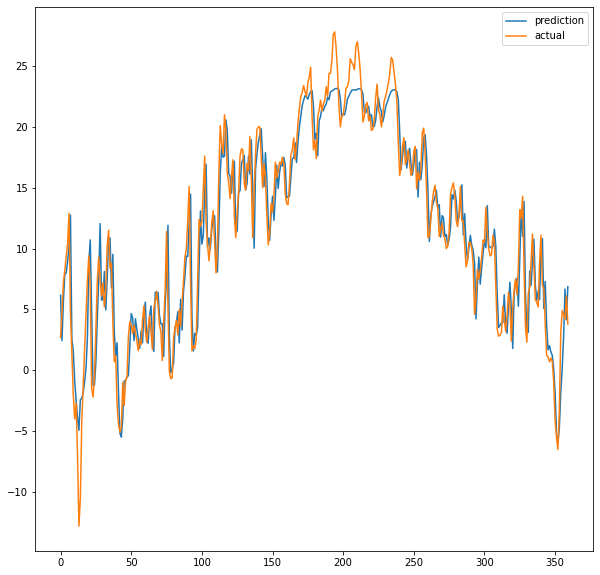

In [ ]:
# plot of actual data vs predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(train_results['Train Predictions'][0:365])
plt.plot(train_results['Actuals'][0:365])
plt.legend(['prediction','actual'])

In [ ]:
#evaluation of model using (rmse)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(train_results['Train Predictions'],train_results['Actuals']))
print(rmse)

2.2517512528046533
